In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-analyse-of-students-success', 'analyse-des-donnes-sur-la-russite-des-tudiants']


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_excel("../input/analyse-des-donnes-sur-la-russite-des-tudiants/mydt.xlsx")
df=pd.read_excel("../input/data-analyse-of-students-success/data2.xlsx")
data.head()



,CNE,NOM,Prénom,analyse1,algebre1,algebre2,physique1,physique2,informatique,TEC,sexe
0,S135346710,AADSSI,Marouane,ABS,0.5,0.5,0.25,1,5,ABS,M
1,S132039580,ABAYAD,Badr-Eddine,10,0.5,6,14,0,10,6,M
2,S138178796,ABIDI,Maroua,2.25,6,5,0.25,7,9,16,F
3,1513806025,ABOUCH,Ayoub,10,10,10,11.5,7,13,10,M
4,S133435375,ABOUCH,Zouhair,10.75,13.5,12.5,14.5,10,13.5,16,M


In [22]:
data.shape

(154, 11)

In [23]:
listcolumns=list(data.columns)
listm=listcolumns[3:10]
listm
datam=data[listm]

datam=datam.replace('ABS',0)
data['moyenne']=datam.mean(axis=1)
data['valider']='oui'
a,x=0,0
for i in range(154):
    if data.loc[i,'moyenne']<10:
        data.at[i,'valider']='non'
        a+=1
    if 'ABS' in list(data.loc[i,:]):
        data.at[i,'valider']='ABS'
        x+=1

data['redoublant']='non'
for i in range(154):
    if data.loc[i,'CNE'] in list(df['CNE']):
        data.at[i,'redoublant']='oui'
data.head()        

          

,CNE,NOM,Prénom,analyse1,algebre1,algebre2,physique1,physique2,informatique,TEC,sexe,moyenne,valider,redoublant
0,S135346710,AADSSI,Marouane,ABS,0.5,0.5,0.25,1,5,ABS,M,1.035714,ABS,non
1,S132039580,ABAYAD,Badr-Eddine,10,0.5,6,14,0,10,6,M,6.642857,non,non
2,S138178796,ABIDI,Maroua,2.25,6,5,0.25,7,9,16,F,6.500000,non,non
3,1513806025,ABOUCH,Ayoub,10,10,10,11.5,7,13,10,M,10.214286,oui,oui
4,S133435375,ABOUCH,Zouhair,10.75,13.5,12.5,14.5,10,13.5,16,M,12.964286,oui,non


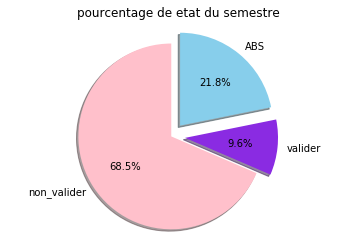

In [24]:
b=154-a
plt.title('pourcentage de etat du semestre') 
labels=["non_valider","valider",'ABS']
values=[a,b,x]
explode=(0, 0.15,0.15)
colors=['pink','blueviolet','skyblue']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')



plt.show()

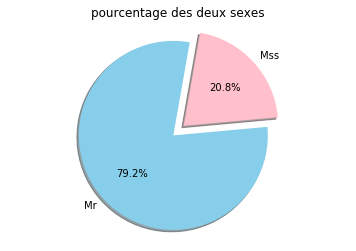

In [25]:
m=0
plt.title('pourcentage des deux sexes') 

for i in range(154):
    if data.loc[i,'sexe']=='M':
        m+=1
f=154-m        
labels=["Mr","Mss"]
values=[m,f]
explode=(0, 0.15)
colors=['skyblue','pink']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=80)
plt.axis('equal')



plt.show()        

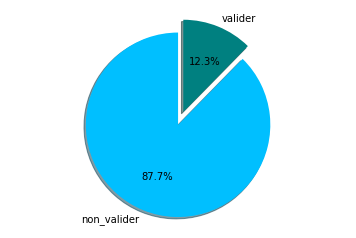

In [26]:

a=0
for i in range(154):
    if data.loc[i,'moyenne']<10:
        data.iat[i,8]='non'
        a+=1
data.head()
b=154-a

labels=["non_valider","valider"]
values=[a,b]
explode=(0, 0.15)
colors=['deepskyblue','teal']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')

plt.show()

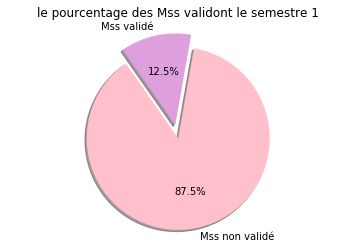

None


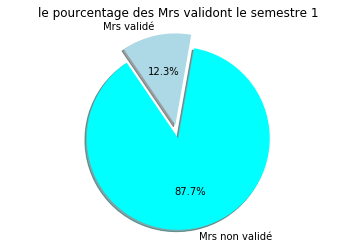

None


In [27]:
v=0

for i in range(154):
    if data.loc[i,'sexe']=='M' and data.loc[i,'valider']=='oui':
        v+=1

w=b-v
nvf=f-w

plt.title('le pourcentage des Mss validont le semestre 1')        
labels=["Mss validé","Mss non validé"]
values=[w,nvf]
explode=(0, 0.15)
colors=['plum','pink']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=80)
plt.axis('equal')

plt.savefig('PieChart01.png')

print(plt.show())
nvm=m-v
plt.title('le pourcentage des Mrs validont le semestre 1')        
labels=["Mrs validé","Mrs non validé"]
values=[v,nvm]
explode=(0, 0.15)
colors=['lightblue','cyan']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=80)
plt.axis('equal')



print(plt.show()) 

               
        
        

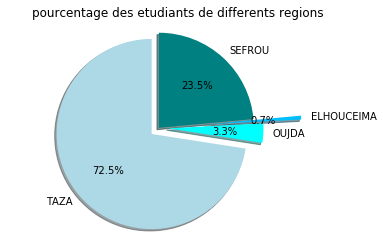

,CNE,NOM,Prénom,analyse1,algebre1,algebre2,physique1,physique2,informatique,TEC,sexe,moyenne,valider,redoublant,region
0,S135346710,AADSSI,Marouane,ABS,0.5,0.5,0.25,1,non,ABS,M,1.035714,ABS,non,TAZA
1,S132039580,ABAYAD,Badr-Eddine,10,0.5,6,14,0,non,6,M,6.642857,non,non,TAZA
2,S138178796,ABIDI,Maroua,2.25,6,5,0.25,7,non,16,F,6.500000,non,non,TAZA
3,1513806025,ABOUCH,Ayoub,10,10,10,11.5,7,13,10,M,10.214286,oui,oui,sefrou
4,S133435375,ABOUCH,Zouhair,10.75,13.5,12.5,14.5,10,13.5,16,M,12.964286,oui,non,TAZA


In [28]:
plt.title('pourcentage des etudiants de differents regions') 
t=0
o=0
s=0
e=0
for i in range(154):
    if type(data.loc[i,'CNE']) is str:
        if data.loc[i,'CNE'][0]=='S':
            data.at[i,'region']='TAZA'
            t+=1
        if data.loc[i,'CNE'][0]=='Z':
            data.at[i,'region']='OUJDA'
            o+=1
        if data.loc[i,'CNE'][0]=='C':
            data.at[i,'region']='elhouceima' 
            e+=1
    elif type(data.loc[i,'CNE']) is int:
        data.at[i,'region']='sefrou'
        s+=1

labels=["TAZA","OUJDA","ELHOUCEIMA","SEFROU"]
values=[t,o,e,s]
explode=(0.1, 0.1,0.5,0)
colors=['lightblue','aqua','deepskyblue','teal']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')

plt.show()
data.head()          
        

In [29]:
d=datam.T       
d['moyenne-classe']=datam.mean(axis=0)
dft=d.T

            

In [30]:

data1=data.sort_values('moyenne', ascending=False).head(10)
data1.index=range(10)
data1

,CNE,NOM,Prénom,analyse1,algebre1,algebre2,physique1,physique2,informatique,TEC,sexe,moyenne,valider,redoublant,region
0,Z173203740,SNIKEH,Mohammed Sghir,11.5,11.5,15.5,18,10,14,12,M,13.214286,oui,non,OUJDA
1,S138028010,AMOURI,Amina,1.25,10,13.5,15.5,17,18,16,F,13.035714,oui,oui,TAZA
2,S133435375,ABOUCH,Zouhair,10.75,13.5,12.5,14.5,10,13.5,16,M,12.964286,oui,non,TAZA
3,S132039343,HIMMIT,Karima,14,5.5,10,17,18,11.5,14.5,F,12.928571,oui,oui,TAZA
4,S145025411,BENLAHCEN,Hayat,0.75,14.5,15,17,10,14,13.5,F,12.107143,oui,oui,TAZA
5,S139024845,MZERD,Mourad,15,7,10.5,14.5,7,15,10,M,11.285714,oui,oui,TAZA
6,S143025523,RAMICH,Mounir,10,4,10,15,10,16.5,12.5,M,11.142857,oui,oui,TAZA
7,C134110005,SENHAJI,Yassine,10.5,10,10,14.5,7,14.5,10.5,M,11.000000,oui,oui,elhouceima
8,1411808150,AZEROUAL,Abdelmounim,5,10,10,13.5,12,14.5,11,M,10.857143,oui,oui,sefrou
9,S130338615,EL OUARIACHI,Ahmed,7.5,10,12,11.5,8,15,11.5,M,10.785714,oui,oui,TAZA


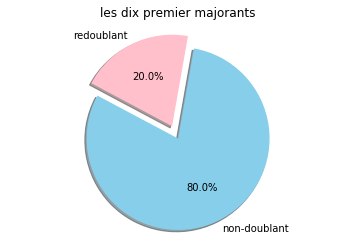

None


In [31]:
t=0
for i in range(10):
    if data1.loc[i,'redoublant']=='non':
        t+=1

plt.title('les dix premier majorants')        
labels=["redoublant","non-doublant"]
values=[t,10-t]
explode=(0, 0.15)
colors=['pink','skyblue']
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=80)
plt.axis('equal')

plt.savefig('PieChart01.png')

print(plt.show()) 
    
    

In [32]:
#nom_prenom=str(input("entrer nom et prenom"))
nom_prenom='AADSSI Marouane'
c=nom_prenom.split()
nom_=c[0]
prenom_=c[1]


In [33]:
N=[]
for i in data.NOM:
    N.append(i)
P =[] 
for i in data.Prénom:
    P.append(i)
   
if nom_ in N and prenom_ in P:
    indice=N.index(nom_)
    data.loc[indice,:]    
data['moyenne']=data.mean(axis=1)
data['valider']='oui'
for i in range(154):
    if data.loc[i,'moyenne']<10:
        data.at[i,'valider']='non'
if data.loc[indice,'valider']=='oui':
    print(nom_,prenom_,'est valider')
else:
    print(nom_,prenom_,'est non valider')

if (datam.loc[indice,'analyse1']+datam.loc[indice,'algebre1']+datam.loc[indice,'algebre2'])/3> (datam.loc[indice,'physique1']+datam.loc[indice,'physique2'])/2:
    print('il a une orientation mathematique plus que physique en génerale ')
    if (datam.loc[indice,'analyse1']+datam.loc[indice,'algebre1']+datam.loc[indice,'algebre2'])/3<8:
        print("mais c'est loin de la barre pour valider")
    elif (datam.loc[indice,'analyse1']+datam.loc[indice,'algebre1']+datam.loc[indice,'algebre2'])>=8 or (datam.loc[indice,'analyse1']+datam.loc[indice,'algebre1']+data.loc[indice,'algebre2'])<10:
        print("besoin juste d un peut d'effort pour valider le module de math")
    else:
        print("le module de mathematique est validé avec succé")
        
else:
    print('il a une orientation physique plus que mathematique en génerale ')
    if (datam.loc[indice,'physique1']+datam.loc[indice,'physique2'])/2<8:
        print("mais c'est loin de la barre pour valider")
    elif (datam.loc[indice,'physique1']+datam.loc[indice,'physique2'])/2>=8 or (datam.loc[indice,'physique1']+datam.loc[indice,'physique2'])/2<10:
        print("besoin juste d un peut d'effort pour valider le module de physique")
    else:
        print("le module de physique est validé avec succé")    
        
        
    
if nom_ in N and prenom_ in P:
    indice=N.index(nom_)
fg=data.loc[indice,:]
datap=pd.concat([fg],axis=1)
dtp=datap.T
dtp    

AADSSI Marouane est non valider
il a une orientation physique plus que mathematique en génerale 
mais c'est loin de la barre pour valider


,CNE,NOM,Prénom,analyse1,algebre1,algebre2,physique1,physique2,informatique,TEC,sexe,moyenne,valider,redoublant,region
0,S135346710,AADSSI,Marouane,ABS,0.5,0.5,0.25,1,non,ABS,M,1.03571,non,non,TAZA


In [34]:
dff=dft.loc[[indice,'moyenne-classe'],:]
ds=dff.T
ds=ds.rename(columns={indice:nom_prenom})
ds


,AADSSI Marouane,moyenne-classe
analyse1,0.00,3.654221
algebre1,0.50,3.313312
algebre2,0.50,5.956169
physique1,0.25,5.418831
physique2,1.00,4.407792
informatique,5.00,9.424545
TEC,0.00,8.806039


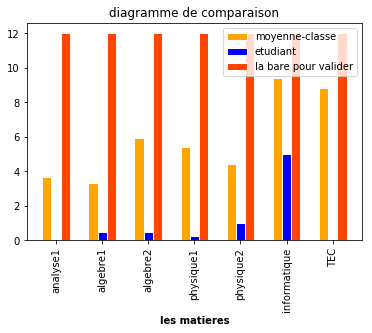

In [35]:
barWidth = 0.2
plt.title('diagramme de comparaison')


bars1 = list(ds['moyenne-classe'])
bars2 = list(ds[nom_prenom])
bars3 = [12,12,12,12,12,12,12]


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
explode=[0.15,0.15,0.15,0.15,0.15,0.15,0.15]

plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='moyenne-classe')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='etudiant')
plt.bar(r3, bars3, color='orangered', width=barWidth, edgecolor='white', label='la bare pour valider')
 

plt.xlabel('les matieres', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['analyse1','algebre1','algebre2','physique1','physique2','informatique','TEC'],rotation=90)


 

plt.legend()
plt.show()


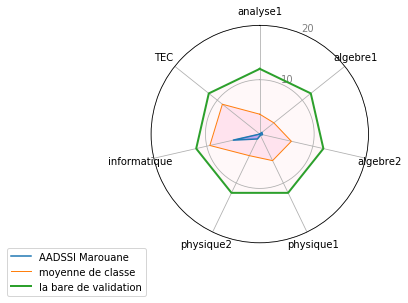

In [36]:
from math import*
 

df = pd.DataFrame({
'moyen-ne': ['moyenne','moyenne-classe','la norme pour valider'],
'analyse1': [ds.iat[0,0],ds.iat[0,1],12],
'algebre1': [ds.iat[1,0],ds.iat[1,1],12],
'algebre2': [ds.iat[2,0],ds.iat[2,1],12],
'physique1': [ds.iat[3,0],ds.iat[3,1],12],
'physique2': [ds.iat[4,0],ds.iat[4,1],12],
'informatique' : [ds.iat[5,0],ds.iat[5,1],12],
'TEC': [ds.iat[6,0],ds.iat[6,1],12]})
 


categories=list(df)[1:]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 


plt.xticks(angles[:-1], categories)
 


plt.yticks([10,20], ["10","20"], color="grey", size=10)
plt.ylim(0,20)

 

values=list(df.loc[0].drop('moyen-ne'))
values += values[:1]
ax.plot(angles, values, linewidth=1.5, label=nom_prenom)
ax.fill(angles, values, 'b', alpha=0.3)
 

values=df.loc[1].drop('moyen-ne').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, label="moyenne de classe")
ax.fill(angles, values, 'deeppink', alpha=0.1)

values=df.loc[2].drop('moyen-ne').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, label="la bare de validation")
ax.fill(angles, values, 'pink', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0, 0))



In [37]:
# Amine Kerboute